In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv ("~/ankit/Github/Machine-Learning/dataset/OldFaithfulData.csv")
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


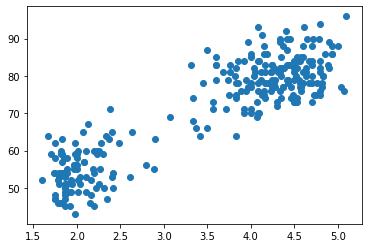

In [14]:
plt.scatter (df ["eruptions"], df ["waiting"])